In [1]:
# 키워드 분석
# 크롤링을통해서 단어나 기사를 수집 json파일로 저장
# 1. 데이터추출 : json파일에서 message 항목만 추출 key()
# 2. 명사 단어 추출 Okt 품사 태깅 패키지로 명사 추출  from konlp.tag import Okt

In [2]:
# 전처리
# -정제 : 불필요한 기호나 문자를 제거 - 정규식을 이용
# -정규화 : 정제와 동일.. 형태가 다른 단어를 하나의 형태로 통합, 대/소문자통합, 유사의미의 단어 통합
# -토큰화 : 토큰으로 분리, 문장토큰, 단어토큰
# -불용어 제거 : 조사 관사 접미사 부사, 분석할 의미가 없는 토큰
# -어간 추출 : 단어의 시제, 단/복수, 진행형.. 다양한어간을 잘라내어 단어의 형태를 일반화

In [3]:
# 워드클라우드. 사용해서 단어들의 군비을 시각화

In [4]:
# 패키지 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 텍스트 분석에 필요한 필수 패키지
!pip install nltk

In [6]:
from functools import reduce # 2차원리스트를 1차원 리스트로 줄이기위한 모듈
from nltk.tokenize import word_tokenize # 단어토큰화
from nltk.corpus import stopwords  # 불용어 정보를 제공
from nltk.stem import WordNetLemmatizer # 단어의형태를 일반화 표제어 추출
from collections import Counter

In [7]:
!pip install wordcloud

In [90]:
from wordcloud import STOPWORDS, WordCloud

In [9]:
import glob  #  경로와 이름을 지정해서 파일을 다루는 모듈  (ex 특정경로밑의 파일들을 검색해서 00/000/*.xlsx)
import re # 정규식을 사용하기위한 모듈

In [10]:
# 파일 읽기
all_files = glob.glob('./word/*.xls')
all_files

['./word\\myCabinetExcelData (1).xls',
 './word\\myCabinetExcelData (2).xls',
 './word\\myCabinetExcelData (3).xls',
 './word\\myCabinetExcelData (4).xls',
 './word\\myCabinetExcelData (5).xls',
 './word\\myCabinetExcelData (6).xls',
 './word\\myCabinetExcelData (7).xls',
 './word\\myCabinetExcelData (8).xls',
 './word\\myCabinetExcelData (9).xls',
 './word\\myCabinetExcelData.xls']

In [11]:
!pip install xlrd

In [12]:
# 데이터 를 dataframe형식으로 리스트 - 리스트 컴프리핸션 이용
all_files_data = [pd.read_excel(filepath) for filepath in all_files]    

In [15]:
# 데이터 병합
all_files_data_concat =  pd.concat(all_files_data)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2015
1,NaN,2,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2016
2,NaN,3,Guest Editorial: Big Data Analytics and the Web,"Sheng, M.; Vasilakos, A. V.; Yu, Q.; You, L.",unknown,2016
3,NaN,4,Parallel computing for preserving privacy usin...,"Yaji, Sharath; Neelima, B.",Inderscience,2018
4,NaN,5,NoSQL databases for big data,"Oussous, Ahmed; Benjelloun, Fatima-Zahra; Lahc...",Inderscience,2017
...,...,...,...,...,...,...
95,NaN,96,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C.",unknown,2017
96,NaN,97,Guest Editorial: Big Scholar Data Discovery an...,"Lin, Y.; Tong, H.; Tang, J.; Candan, K. S.",unknown,2017
97,NaN,98,Guest Editorial: Big Media Data: Understanding...,"Wang, J.; Qi, G.; Sebe, N.; Aggarwal, C. C.",unknown,2016
98,NaN,99,Speed Up Big Data Analytics by Unveiling the S...,"Wang, J.; Zhang, X.; Yin, J.; Wang, R.; Wu, H....",unknown,2018


In [16]:
# 분석대상이 되는 text만 추출 - 제목
all_title = all_files_data_concat['제목']
all_title

0     Guest Editorial: Big Media Data: Understanding...
1     Guest Editorial: Big Scholar Data Discovery an...
2       Guest Editorial: Big Data Analytics and the Web
3     Parallel computing for preserving privacy usin...
4                          NoSQL databases for big data
                            ...                        
95    Guest Editorial: Big Media Data: Understanding...
96    Guest Editorial: Big Scholar Data Discovery an...
97    Guest Editorial: Big Media Data: Understanding...
98    Speed Up Big Data Analytics by Unveiling the S...
99          Architecting Time-Critical Big-Data Systems
Name: 제목, Length: 1000, dtype: object

In [19]:
# 불용어 제거
import nltk
nltk.download('stopwords')  # nltk 제공하는 불용어를 다운로드
stopWords = set(stopwords.words("english")) # 불용어중에 영어 불용어를 추출

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [21]:
lemma = WordNetLemmatizer() # 표제어 추출

In [29]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


True

In [32]:
words = []
for title in all_title:
    EnWords =  re.sub(r"[^a-zA-Z]+"," ",str(title))
    EnWordsToken =  word_tokenize(EnWords.lower())
    EnWordsTokenStop =  [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma =  [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

In [33]:
words

[['guest',
  'editorial',
  'big',
  'medium',
  'data',
  'understanding',
  'search',
  'mining',
  'part'],
 ['guest',
  'editorial',
  'big',
  'scholar',
  'data',
  'discovery',
  'collaboration'],
 ['guest', 'editorial', 'big', 'data', 'analytics', 'web'],
 ['parallel',
  'computing',
  'preserving',
  'privacy',
  'using',
  'k',
  'anonymisation',
  'algorithm',
  'big',
  'data'],
 ['nosql', 'database', 'big', 'data'],
 ['computation',
  'migration',
  'new',
  'approach',
  'execute',
  'big',
  'data',
  'bioinformatics',
  'workflow'],
 ['towards',
  'real',
  'time',
  'big',
  'data',
  'analytics',
  'platform',
  'health',
  'application'],
 ['new',
  'approach',
  'accurate',
  'distributed',
  'cluster',
  'analysis',
  'big',
  'data',
  'competitive',
  'k',
  'mean'],
 ['five', 'layer', 'architecture', 'big', 'data', 'processing', 'analytics'],
 ['towards',
  'max',
  'min',
  'fair',
  'resource',
  'allocation',
  'stream',
  'big',
  'data',
  'analytics',
  's

In [46]:
# word 2차원 - > 1차원
words2 = reduce(lambda x,y : x+y, words)
words2[:5]

['guest', 'editorial', 'big', 'medium', 'data']

In [51]:
# 단어 빈도수 구하기
count = Counter(words2)
count.most_common(50)

[('data', 1645),
 ('big', 1354),
 ('analytics', 137),
 ('analysis', 67),
 ('based', 62),
 ('using', 57),
 ('system', 50),
 ('science', 50),
 ('management', 48),
 ('challenge', 47),
 ('approach', 44),
 ('mining', 40),
 ('new', 38),
 ('research', 38),
 ('health', 37),
 ('model', 37),
 ('cloud', 34),
 ('smart', 34),
 ('learning', 33),
 ('opportunity', 31),
 ('processing', 30),
 ('technology', 28),
 ('small', 27),
 ('framework', 26),
 ('information', 26),
 ('computing', 25),
 ('application', 25),
 ('driven', 24),
 ('social', 24),
 ('issue', 24),
 ('quality', 23),
 ('network', 23),
 ('deal', 23),
 ('knowledge', 22),
 ('efficient', 22),
 ('review', 22),
 ('use', 22),
 ('era', 22),
 ('healthcare', 21),
 ('storage', 21),
 ('service', 21),
 ('perspective', 21),
 ('open', 20),
 ('platform', 19),
 ('survey', 19),
 ('making', 19),
 ('process', 19),
 ('distributed', 18),
 ('large', 18),
 ('environment', 18)]

In [53]:
word_count = dict()
for tag, counts in count.most_common(50):
    if(len(str(tag))> 1):  # 단어의 길이가 1보다 큰경우만 추출
        word_count[tag] = counts
word_count        

{'data': 1645,
 'big': 1354,
 'analytics': 137,
 'analysis': 67,
 'based': 62,
 'using': 57,
 'system': 50,
 'science': 50,
 'management': 48,
 'challenge': 47,
 'approach': 44,
 'mining': 40,
 'new': 38,
 'research': 38,
 'health': 37,
 'model': 37,
 'cloud': 34,
 'smart': 34,
 'learning': 33,
 'opportunity': 31,
 'processing': 30,
 'technology': 28,
 'small': 27,
 'framework': 26,
 'information': 26,
 'computing': 25,
 'application': 25,
 'driven': 24,
 'social': 24,
 'issue': 24,
 'quality': 23,
 'network': 23,
 'deal': 23,
 'knowledge': 22,
 'efficient': 22,
 'review': 22,
 'use': 22,
 'era': 22,
 'healthcare': 21,
 'storage': 21,
 'service': 21,
 'perspective': 21,
 'open': 20,
 'platform': 19,
 'survey': 19,
 'making': 19,
 'process': 19,
 'distributed': 18,
 'large': 18,
 'environment': 18}

<AxesSubplot:>

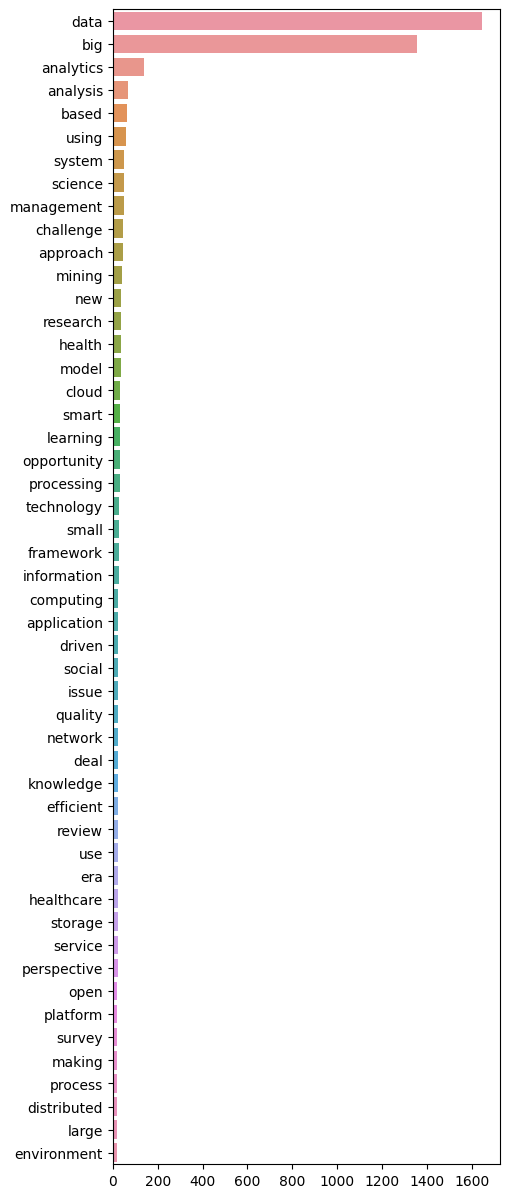

In [70]:
# 시각화 하기
# 1 bar 그래프 그리기
sorted_key =  sorted(word_count, key=word_count.get,reverse=True)
sorted_values = sorted(word_count.values(), reverse=True)
plt.figure(figsize=(5,15))
sns.barplot(x=sorted_values,y=sorted_key)

<AxesSubplot:>

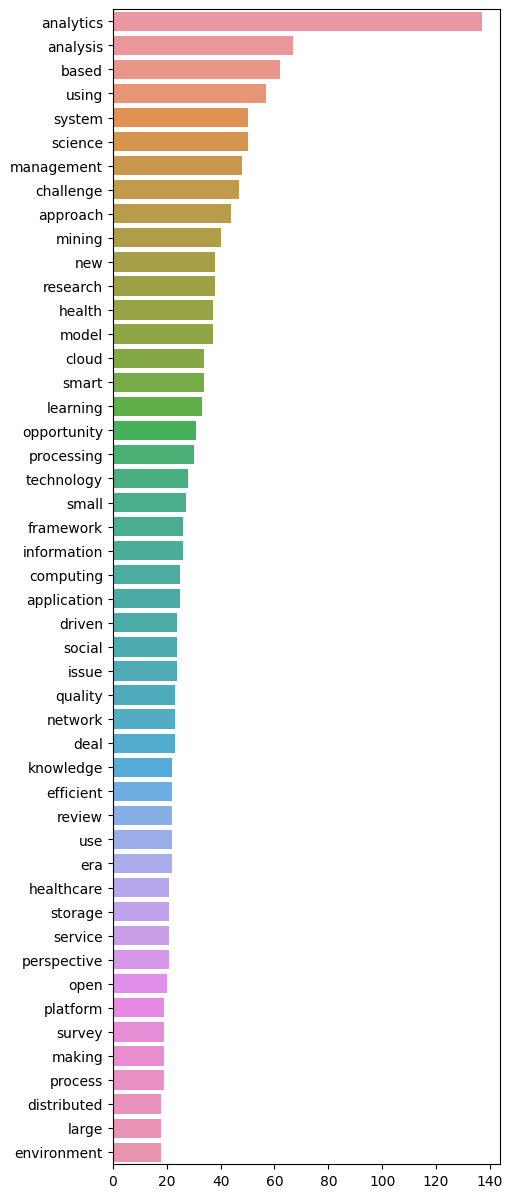

In [74]:
# 시각화 하기
# 1 bar 그래프 그리기 - word_count에서 data big 제거하고 
temp = word_count.copy()
del(temp['data'])
del(temp['big'])
sorted_key =  sorted(temp, key=word_count.get,reverse=True)
sorted_values = sorted(temp.values(), reverse=True)
plt.figure(figsize=(5,15))
sns.barplot(x=sorted_values,y=sorted_key)

In [77]:
import matplotlib
import matplotlib.font_manager as fm
font_loc = 'C:/Windows/Fonts/H2PORM.TTF'
font_name = fm.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False  # 한글폰트적용시 - 깨짐방지..

<AxesSubplot:xlabel='count', ylabel='출판일'>

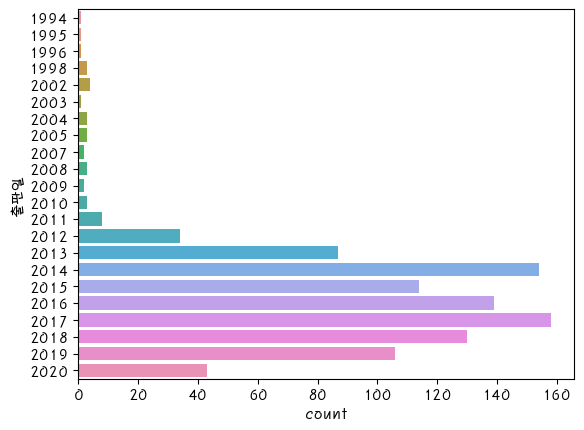

In [79]:
all_files_data_concat.head()
# 출판일 기준으로 논문의 출판현황
sns.countplot(data=all_files_data_concat, y = '출판일')

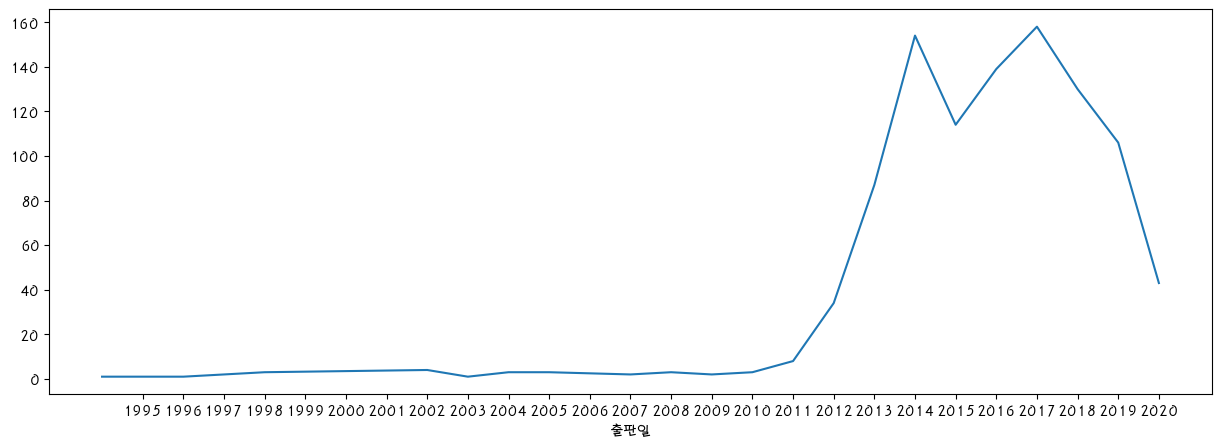

In [85]:
temp = all_files_data_concat.groupby(['출판일'])['제목'].count()
plt.figure(figsize=(15,5))
sns.lineplot(data=temp, x = temp.index, y= temp.values)
plt.xticks(range(1995,2021))
plt.show()

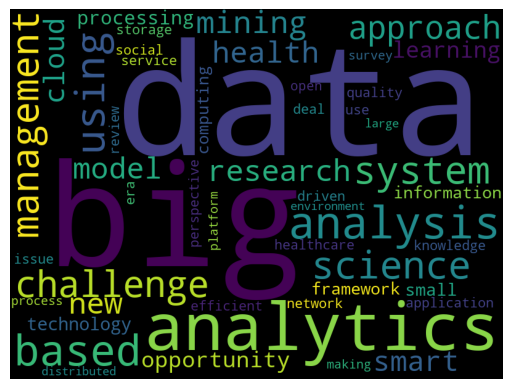

In [97]:
wc = WordCloud(stopwords=stopWords,width=800,height=600)
cloud =  wc.generate_from_frequencies(word_count)
plt.imshow(cloud)
plt.axis('off')
plt.show()


In [98]:
!pip install konlpy

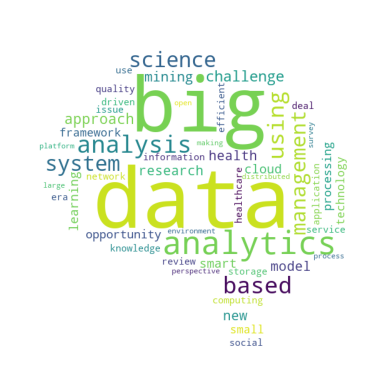

In [106]:
from PIL import Image
im = Image.open('./word/face2.jpg')
mask_arr = np.array(im)
wc = WordCloud(stopwords=stopWords,width=800,height=600, mask=mask_arr,background_color='white')
cloud =  wc.generate_from_frequencies(word_count)
plt.imshow(cloud)
plt.axis('off')
plt.show()